# 🕵️‍♂️ Credit Fraud Detection using QML 🚀

### 🌟 **Introduction**  
In this kernel, we’ll use predictive models to determine whether a transaction is **legitimate** or **fraudulent**. The dataset features are scaled and anonymized for privacy, but we can still extract valuable insights. Let’s begin!  

### 🎯 **Our Goals:**  
- ✔️ Understand the distribution of the provided (anonymized) data.  
- ✔️ Create a **balanced** 50/50 sub-dataset of Fraud vs. Non-Fraud transactions (using NearMiss Algorithm).  
- ✔️ Compare multiple classifiers and identify the most accurate one.  
- ✔️ Build a **Neural Network** and benchmark its performance against the best classifier.  

## 📚 **Outline:**  

- ### **I. Understanding Our Data**  
🔍 a) Gather Insights from the Data

- ### **II. Preprocessing**  
⚖️ a) Scaling and Distributing 
✂️ b) Splitting the Data 

- ### **III. Random Undersampling & Oversampling**  
📊 a) Distributing and Correlating
🛑 b) Anomaly Detection
🌀 c) Dimensionality Reduction (t-SNE) 
🤖 d) Classifiers  
📉 e) Logistic Regression Deep Dive 
🔄 f) Oversampling with SMOTE

- ### **IV. Testing**  
🧪 a) Logistic Regression Testing  
🧠 b) Neural Networks (Undersampling vs. Oversampling) 

---

### 🚀 **Let’s dive into the data!**  

## 🔍 Gather Sense of Our Data
<a id="gather"></a>

First, let's understand the <b>basic characteristics</b> of our dataset. Note that except for <b>Time</b> and <b>Amount</b>, all other columns are anonymized (due to privacy concerns) and have been scaled through PCA transformations.

### 📊 Summary:
- 💰 The <b>average transaction amount</b> is relatively small: ~USD 88
- ✅ <b>No missing values</b> - we don't need to handle null data
- ⚖️ <b>Extreme class imbalance</b>:
  - Non-Fraud: 99.83% of transactions
  - Fraud: Only 0.17% of transactions

### ⚙️ Feature Technicalities:
- 🌀 <b>PCA Transformation</b>: 
  - All features (except Time and Amount) have undergone Principal Component Analysis
- ⚖️ <b>Scaling</b>:
  - PCA requires features to be scaled first
  - We assume the dataset creators properly scaled all V-features

In [253]:
import numpy as npe
import pandas as pd
import tensorflow as tf 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

#print dataset
df = pd.read_csv('./dataset/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [254]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [255]:
df.isnull().sum().max()

np.int64(0)

✅ <b>No missing values</b> - we don't need to handle null data

In [256]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [257]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


**Note:** 📢 Notice how imbalanced our original dataset is! ⚖️  

- **Majority Class:** Most of the transactions (💰) are **non-fraud**.  
- **Problem:** If we use this imbalanced dataset for predictive models, we might face:  
  - ❌ **High error rates** – Models may perform poorly on fraud detection.  
  - 🤖 **Overfitting** – Algorithms could "assume" most transactions are legit and ignore fraud patterns.  

🔍 **What We Want:**  
- Our model shouldn’t just *assume* – we want it to **detect subtle fraud signals**! 🕵️‍♂️  
- Proper handling (e.g., resampling, anomaly detection) is crucial for accurate fraud prediction. 🚀  

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

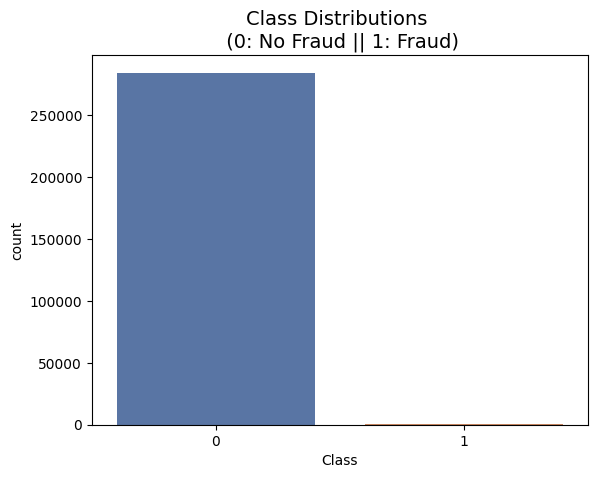

In [258]:
sns.countplot(x='Class', data=df, palette="deep")
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

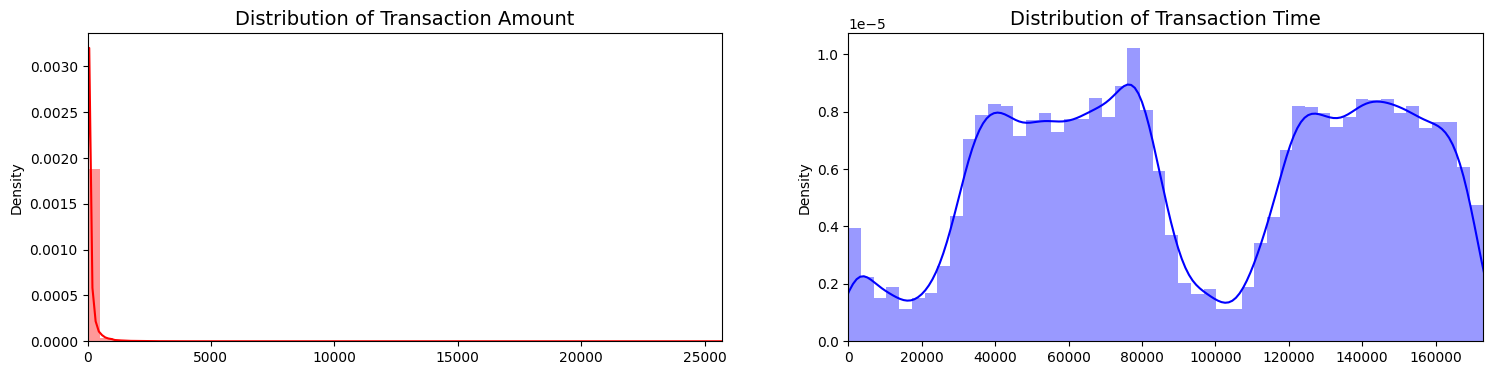

In [259]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))
amount_val = df['Amount'].values
time_val = df['Time'].values
sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
plt.show()

## 📊 Scaling and Distributing  

<a id="distributing"></a>  

In this phase, we will:  
1. **Scale** the `Time` and `Amount` columns (like other features)  
2. Create a **balanced sub-sample** of fraud/non-fraud cases  

---

### 🔍 What is a Sub-Sample?  
A dataframe with:  
✔ **50/50 ratio** of Fraud/Non-Fraud  
✔ Same number of cases for each class  

---

- ### 📌 Implementation Steps  
1. **🔄 Scale Features**  
   - `scaled_amount` and `scaled_time` created  
   - Normalized like other columns  

2. **⚖️ Balance Classes**  
   - 492 fraud cases → randomly select 492 non-fraud  
   - Concatenate into new sub-sample  

3. **🎯 Result**  
   - Clean, balanced dataset for proper training  


In [260]:
# StandardScaler - Standardizes features by removing mean and scaling to unit variance
# RobustScaler - Scales features using statistics robust to outliers (uses median/IQR)

from sklearn.preprocessing import RobustScaler
# from sklearn.preprocessing import StandardScaler

# Initialize scaler objects
# We choose RobustScaler for these features because:
# - Transaction amounts may have extreme outliers
# - Time differences might have unusual patterns

#std_scaler = StandardScaler()  # Not used here, but shown for reference
rob_scaler = RobustScaler()    

# Scale the Amount column:
# - reshape(-1,1) converts to 2D array as required by sklearn
# - fit_transform calculates scaling params and applies in one step
# - creates new 'scaled_amount' column with normalized values
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# Scale the Time column using same approach
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

# Remove original unscaled columns:
# - axis=1 specifies we're dropping columns (not rows)
# - inplace=True modifies the dataframe directly
df.drop(['Time','Amount'], axis=1, inplace=True)

In [261]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)
# Amount and Time are Scaled!
df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the Data (Original DataFrame)

In [262]:
"""
StratifiedKFold Cross-Validation Explained:
------------------------------------------
When dealing with imbalanced datasets (like fraud detection where fraud cases may be <1%), 
normal random splitting can create subsets with unrepresentative class distributions.

StratifiedKFold preserves the original class distribution in each fold by:
1. Separating data into k folds (groups)
2. Ensuring each fold maintains the same percentage of target classes as the full dataset
3. This is particularly crucial for:
   - Model evaluation on rare classes
   - Preventing folds with zero fraud cases
   - Getting reliable performance metrics

Key Parameters:
- n_splits: Number of folds (typically 5 or 10)
- shuffle: Whether to shuffle data before splitting
- random_state: For reproducible splits
"""

from sklearn.model_selection import StratifiedKFold
import numpy as np

# Display original class distribution (severe imbalance common in fraud datasets)
print('[Class Distribution]')
print(f'Non-Fraud: {df["Class"].value_counts()[0]/len(df)*100:.2f}%')
print(f'Fraud: {df["Class"].value_counts()[1]/len(df)*100:.2f}%')

# Prepare features (X) and target (y)
X = df.drop('Class', axis=1)  # All features excluding target
y = df['Class']  # Binary target (0: Normal, 1: Fraud)

# Initialize StratifiedKFold with recommended settings for fraud detection:
# - 5 folds for reliable validation without excessive computation
# - shuffle=True to avoid ordered patterns (but set random_state for reproducibility)
# - random_state=42 for consistent results across runs
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print('\n[Stratified Folding Process]')
for fold_num, (train_idx, test_idx) in enumerate(stratified_cv.split(X, y), 1):
    # Split data while preserving class ratios
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    
    # Convert to numpy arrays (better for most ML algorithms)
    X_train, X_test = X_train.values, X_test.values
    y_train, y_test = y_train.values, y_test.values
    
    # Verify stratification success
    train_dist = np.unique(y_train, return_counts=True)[1]/len(y_train)
    test_dist = np.unique(y_test, return_counts=True)[1]/len(y_test)
    
    print(f'\nFold {fold_num}:')
    print(f'Train distribution: Non-Fraud={train_dist[0]:.4f}, Fraud={train_dist[1]:.4f}')
    print(f'Test distribution: Non-Fraud={test_dist[0]:.4f}, Fraud={test_dist[1]:.4f}')
    print(f'Samples - Train: {len(X_train)}, Test: {len(X_test)}')

[Class Distribution]
Non-Fraud: 99.83%
Fraud: 0.17%

[Stratified Folding Process]

Fold 1:
Train distribution: Non-Fraud=0.9983, Fraud=0.0017
Test distribution: Non-Fraud=0.9983, Fraud=0.0017
Samples - Train: 227845, Test: 56962

Fold 2:
Train distribution: Non-Fraud=0.9983, Fraud=0.0017
Test distribution: Non-Fraud=0.9983, Fraud=0.0017
Samples - Train: 227845, Test: 56962

Fold 3:
Train distribution: Non-Fraud=0.9983, Fraud=0.0017
Test distribution: Non-Fraud=0.9983, Fraud=0.0017
Samples - Train: 227846, Test: 56961

Fold 4:
Train distribution: Non-Fraud=0.9983, Fraud=0.0017
Test distribution: Non-Fraud=0.9983, Fraud=0.0017
Samples - Train: 227846, Test: 56961

Fold 5:
Train distribution: Non-Fraud=0.9983, Fraud=0.0017
Test distribution: Non-Fraud=0.9983, Fraud=0.0017
Samples - Train: 227846, Test: 56961


### 🔄 Random Under-Sampling for Class Imbalance
Random Under-Sampling is a technique to address **class imbalance** by reducing the majority class to match the minority class size. In fraud detection (where fraud cases are typically <1%), this creates a balanced 50/50 distribution for more effective model training.

In [263]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)
# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]
normal_distributed_df = pd.concat([fraud_df, non_fraud_df])
# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)
new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
34008,5.456578,-0.554776,0.378205,-0.900353,-0.478563,1.447525,-0.237335,-0.352145,0.905614,-0.169666,...,0.634461,0.340669,0.084289,-0.459710,0.244517,0.555140,-0.323286,-0.075838,0.070386,0
190368,2.150493,0.518227,-2.272473,2.935226,-4.871394,2.419012,-1.513022,-0.480625,-2.126136,1.883507,...,-0.031085,0.718504,0.893850,-0.031632,0.322913,-0.058406,-0.411649,0.573803,0.176067,1
85339,1.521694,-0.281488,1.057573,-0.212706,-0.429784,0.333196,0.043310,-0.447592,0.389073,-0.090706,...,0.112900,-0.324532,-1.341542,-0.063474,-0.535066,0.280894,0.163075,-0.099895,0.010019,0
14338,-0.254873,-0.696272,1.125336,1.130146,-0.962975,2.675688,0.990075,-0.243318,0.316192,0.122960,...,-0.138814,-0.166737,-0.521934,-0.112376,-0.592077,0.520791,0.043354,0.015159,0.063612,1
102446,-0.293440,-0.193670,-13.192671,12.785971,-9.906650,3.320337,-4.801176,5.760059,-18.750889,-37.353443,...,-3.493050,27.202839,-8.887017,5.303607,-0.639435,0.263203,-0.108877,1.269566,0.939407,1


##  Equally Distributing and Correlating: 
<a id="correlating"></a>
Now that we have our dataframe correctly balanced, we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


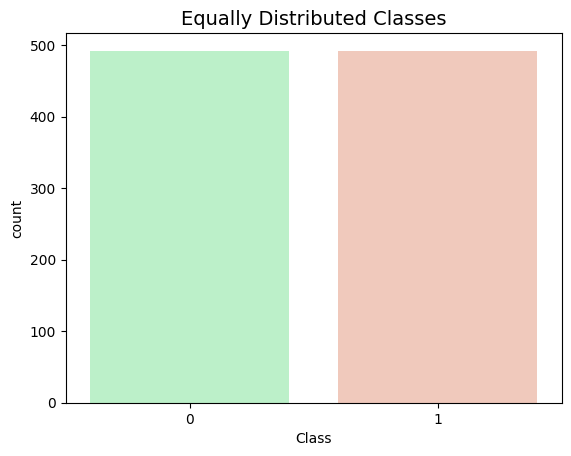

In [264]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))
sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

### 🔍 Correlation Matrices: Understanding Feature Relationships

- 🎯 Purpose
Correlation matrices help us identify which features strongly influence fraud detection. Using our **balanced subsample** is crucial - the original imbalanced data would distort these relationships.

- 📊 Key Insights from Correlation Analysis

    -🔻 Strong Negative Correlations (Higher values = Less likely fraud)
    - **V17**: Highest negative correlation  
    - **V14**: Clear separation between fraud/non-fraud  
    - **V12**: Notable pattern with transaction amounts  
    - **V10**: Important secondary indicator  

*Interpretation*: When these values are **lower**, the transaction is more likely to be fraudulent.

- 🔺 Strong Positive Correlations (Higher values = More likely fraud)  
  - **V11**: Most significant positive indicator  
  - **V4**: Strong pattern with digital transactions  
  - **V2**: Moderate correlation  
  - **V19**: Secondary positive indicator  

*Interpretation*: These features increase with fraudulent activity.

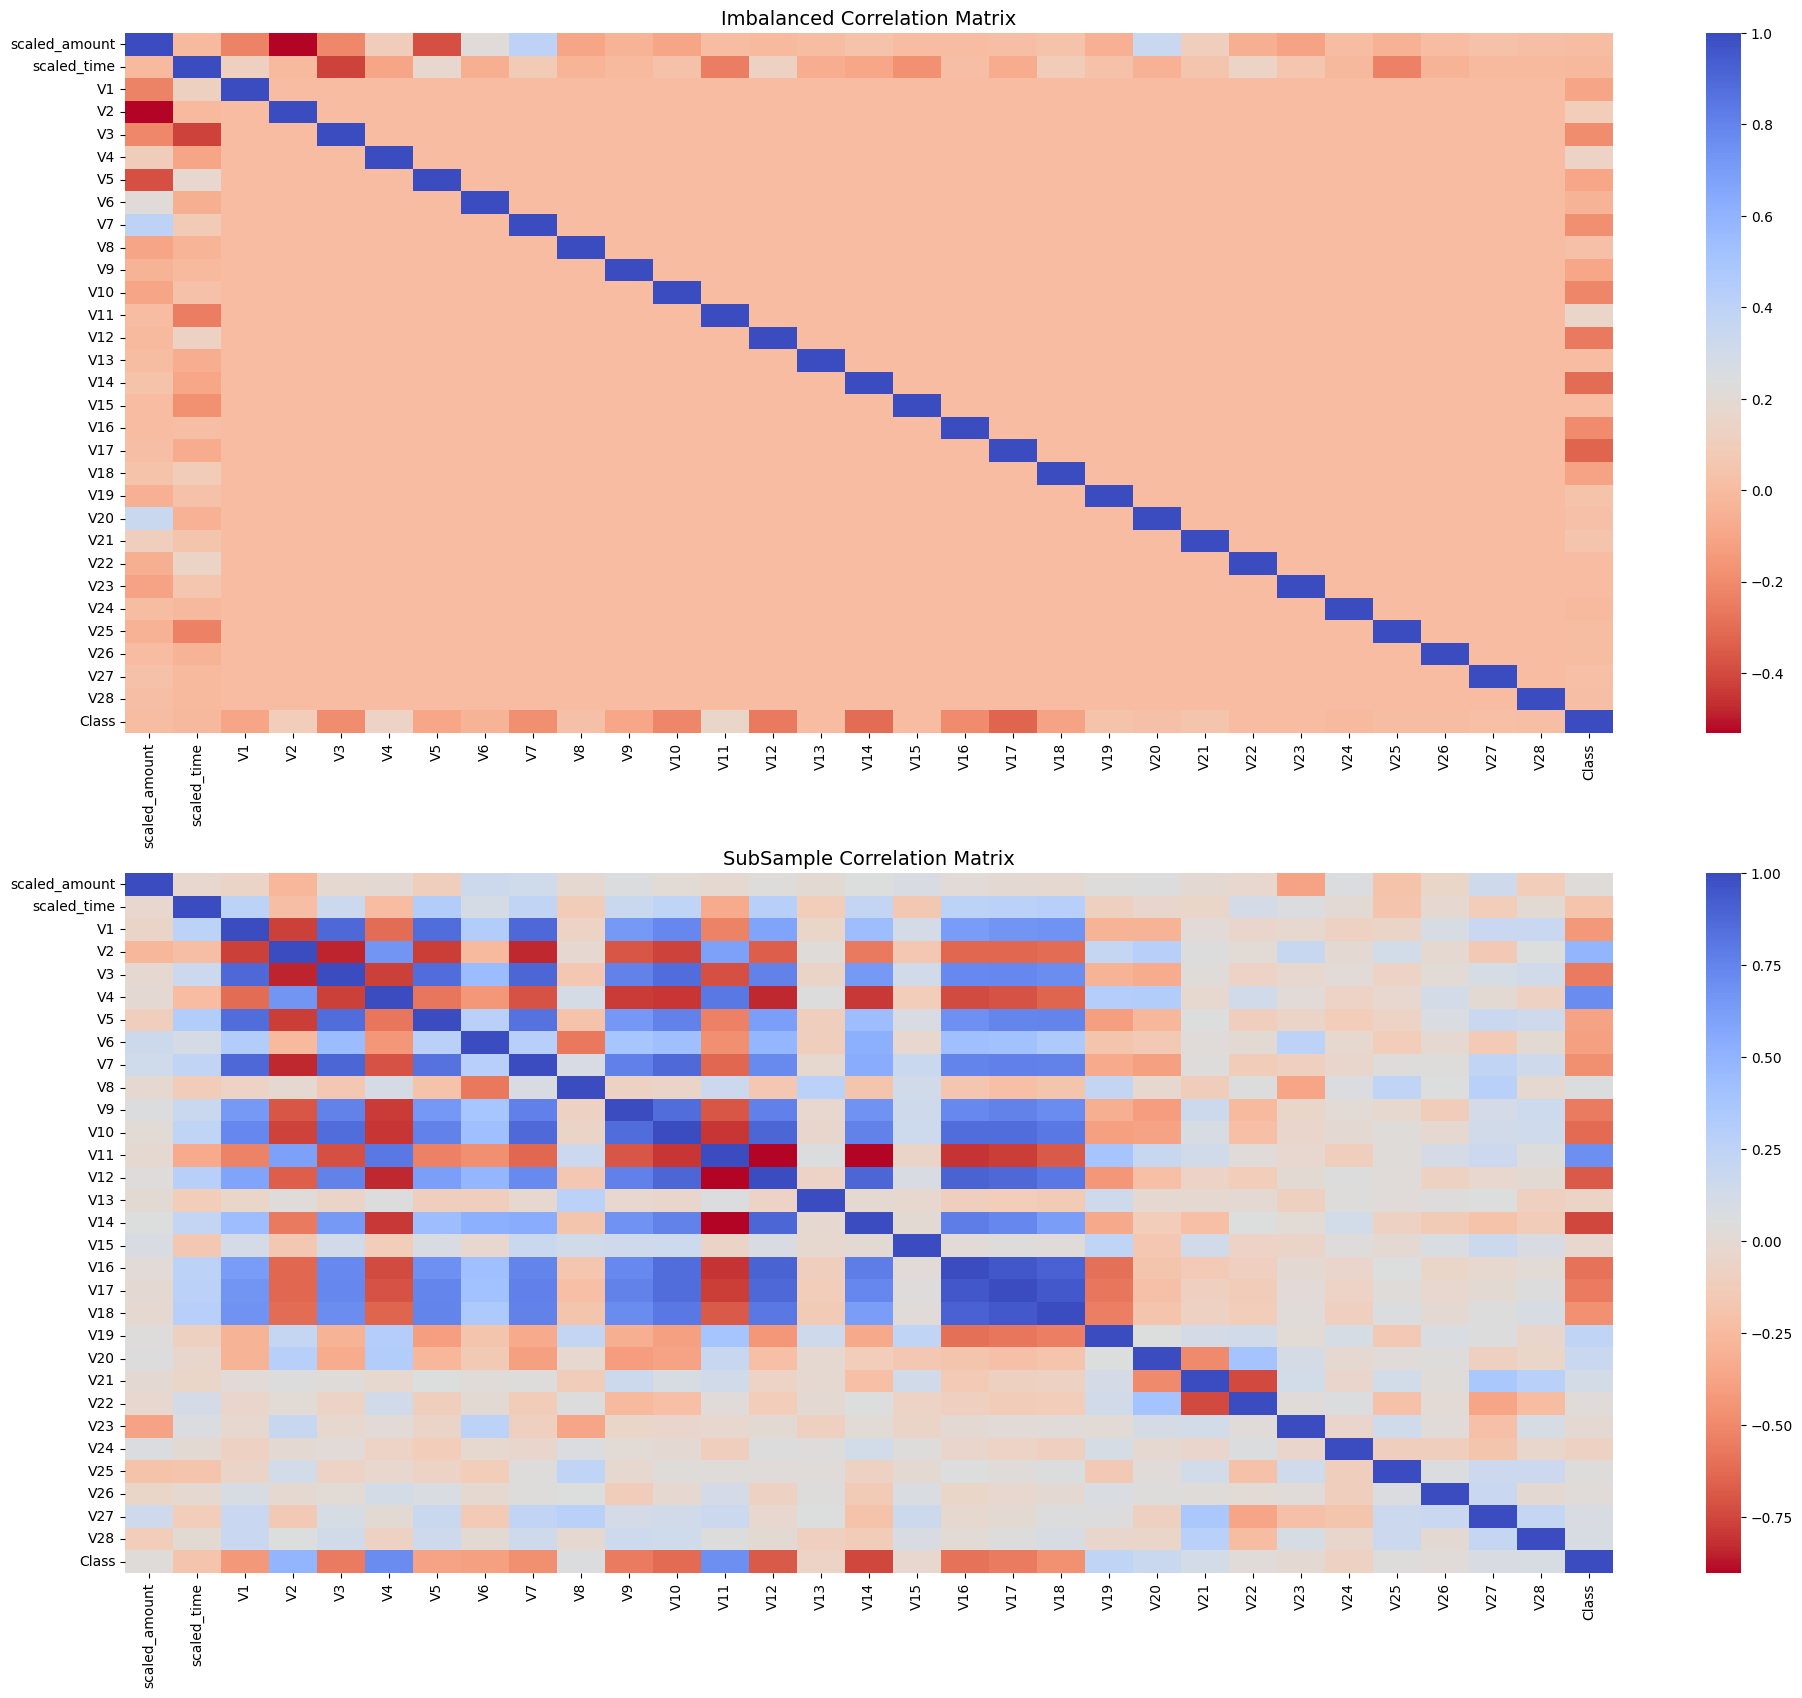

In [265]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix', fontsize=14)
plt.show()

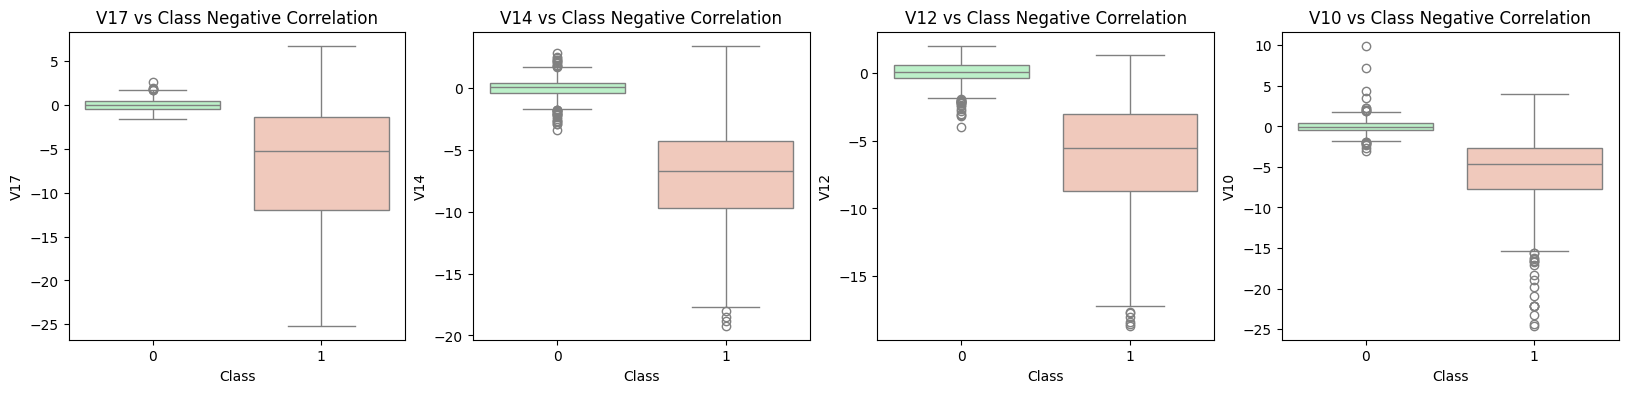

In [266]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="Class", y="V17", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V14", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V12", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')
sns.boxplot(x="Class", y="V10", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')
plt.show()

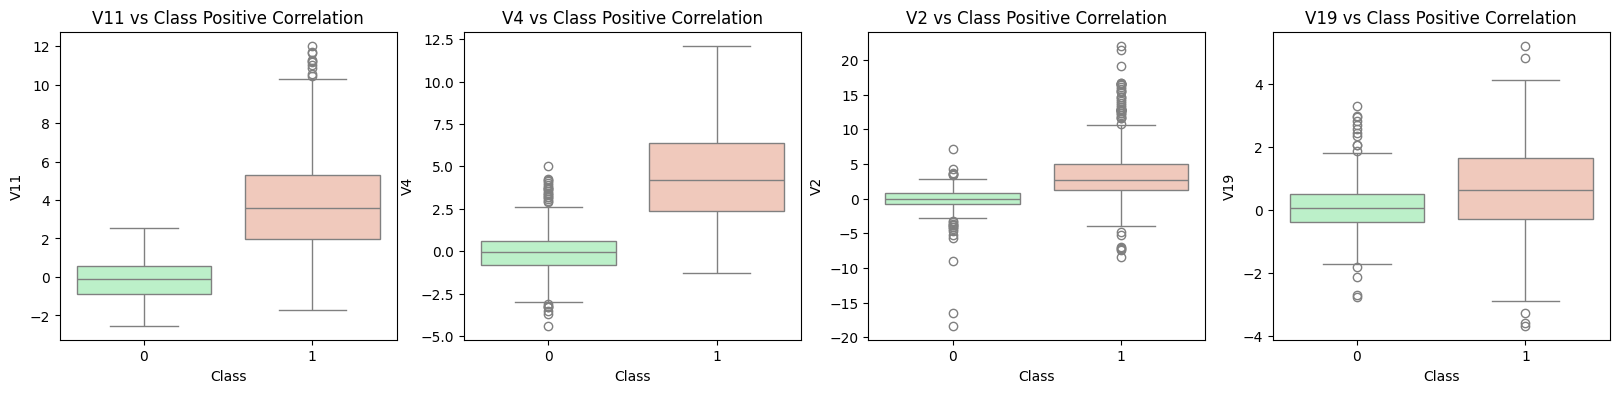

In [267]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))
# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V4", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V2", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')
sns.boxplot(x="Class", y="V19", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')
plt.show()

### **Anomaly Detection**

This section focuses on removing **extreme outliers** from features highly correlated with the target classes, aiming to improve model accuracy.

---

- ### 📊 Interquartile Range (IQR) Method

- **IQR** = Q3 − Q1 (75th percentile − 25th percentile)
- A value is considered an **extreme outlier** if it falls outside:
  - Q1 − (threshold × IQR)
  - Q3 + (threshold × IQR)

**Typical threshold:** 1.5  
Higher threshold → fewer outliers removed  
Lower threshold → more outliers removed

---

- ### ⚖️ Outlier Removal Tradeoff

- A low threshold removes more data, increasing the risk of **information loss**.
- Focus on removing only **extreme** outliers to avoid reducing model performance.
- Experiment with different thresholds to evaluate their impact on model accuracy.

---

- ### ✅ Process Overview

1. **Visualize distributions** of selected features  
   (e.g., V14 follows a Gaussian distribution, unlike V10 and V12).
2. **Calculate thresholds**:
   - Lower bound = Q1 − (threshold × IQR)
   - Upper bound = Q3 + (threshold × IQR)
3. **Filter data**: remove values beyond both thresholds.
4. **Use boxplots** to confirm that extreme outliers have been reduced.

---

- ### 📈 Results

- Outlier removal improved accuracy by **over 3%**.
- Be cautious: too much filtering can cause **underfitting** by discarding valuable data.


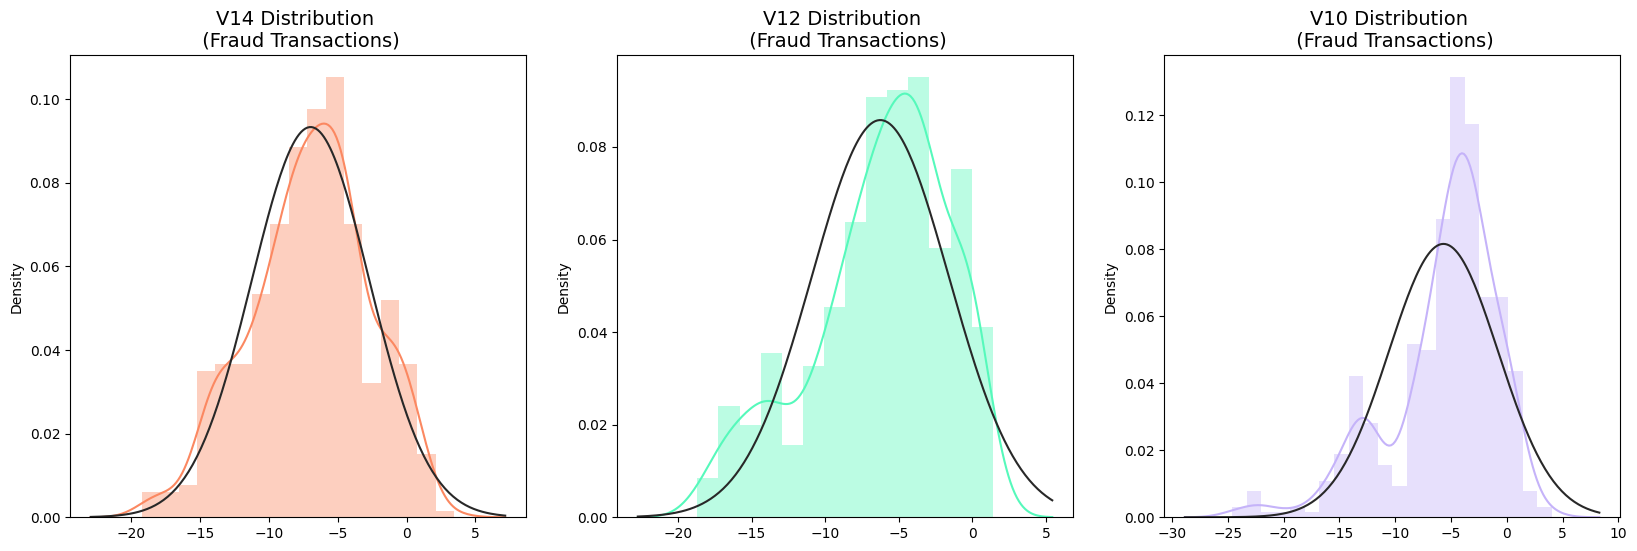

In [268]:
from scipy.stats import norm
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20, 6))
v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.distplot(v14_fraud_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)
v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.distplot(v12_fraud_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)
v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.distplot(v10_fraud_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)
plt.show()

In [269]:
# -----> V14 Removing Outliers (Highest Negative Correlated with Labels)
# Extracting V14 values for fraud cases and computing the IQR
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
v14_iqr = q75 - q25
# Calculating lower and upper bounds for outlier removal
v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
# Identifying and removing outliers in V14 for fraud cases
outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
# -----> V12 Removing Outliers from Fraud Transactions
# Repeating the IQR-based method for feature V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
v12_iqr = q75 - q25
v12_cut_off = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
# Identifying and removing outliers in V12 for fraud cases
outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
# -----> V10 Removing Outliers
# Applying the same outlier removal strategy for feature V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
v10_iqr = q75 - q25
v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
# Identifying and removing outliers in V10 for fraud cases
outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)

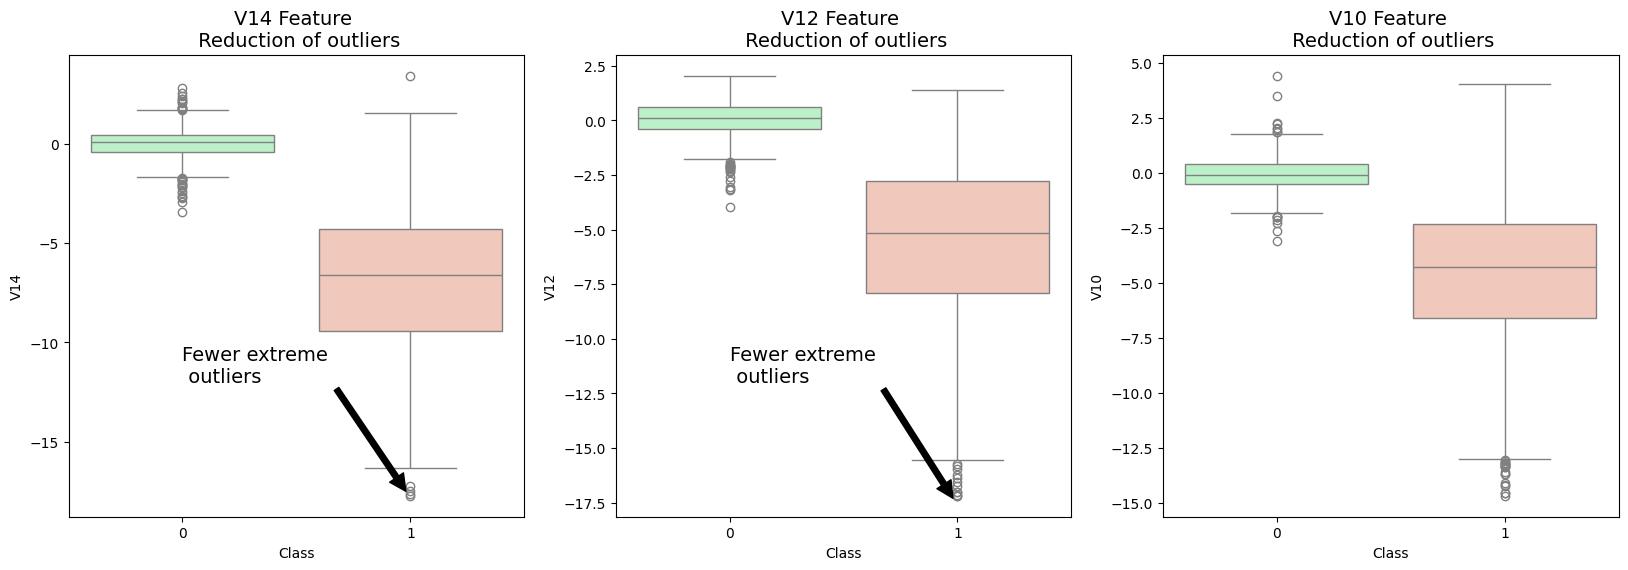

In [270]:
# Create a figure with 3 subplots side by side
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
# Define custom colors for fraud and non-fraud classes
colors = ['#B3F9C5', '#f9c5b3']
# -----> Boxplot for V14 Feature
# Plotting V14 after outlier removal
sns.boxplot(x="Class", y="V14", data=new_df, ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
# Adding annotation to highlight reduction of outliers
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)
# -----> Boxplot for V12 Feature
# Plotting V12 after outlier removal
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
# Annotation to show the effect of outlier reduction
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)
# -----> Boxplot for V10 Feature
# Plotting V10 after outlier removal
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
# Annotation showing outlier reduction impact
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
             arrowprops=dict(facecolor='black'), fontsize=14)
# Display all plots
plt.show()

We'll use the new dataframe for our QML in the other notebook!

In [271]:
#write the new dataframe to a csv file
new_df.to_csv('./dataset/creditcard_subsample.csv', index=False)

----------------------------------------------------------------------------------------

### Dimensionality Reduction & Clustering

- **🧠 t-SNE**
  - The **t-SNE algorithm** effectively clusters **fraud** and **non-fraud** cases in the dataset.
  - Despite using a small subsample (with shuffling), t-SNE consistently identifies clear clusters.
  - These results suggest that future **predictive models** will likely perform well in distinguishing fraudulent transactions.

In [272]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))
# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))
# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.5 s
PCA took 0.0 s
Truncated SVD took 0.001 s


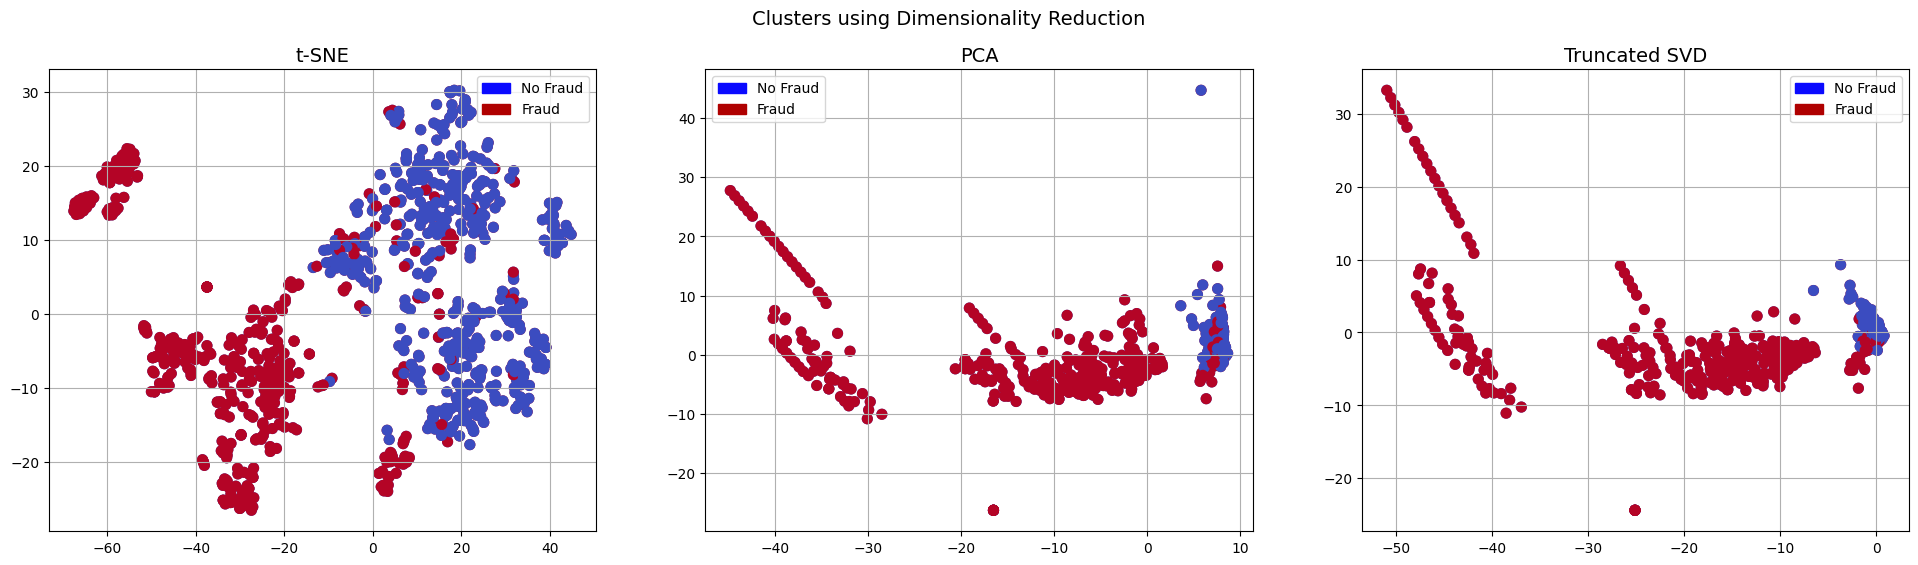

In [273]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)
blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')
# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)
ax1.grid(True)
ax1.legend(handles=[blue_patch, red_patch])
# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)
ax2.grid(True)
ax2.legend(handles=[blue_patch, red_patch])
# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)
ax3.grid(True)
ax3.legend(handles=[blue_patch, red_patch])
plt.show()

## Classifiers - Classical ML (UnderSampling)

In this section, we train four different classifiers to determine which one is most effective at detecting **fraudulent transactions**.  
Before training, we split the data into training and testing sets and separate features from labels.

---

### 📌 Summary

- **Logistic Regression** outperforms the other classifiers in most cases and will be analyzed further.
- **GridSearchCV** is used to find the optimal hyperparameters for each model.
- Logistic Regression achieves the best **ROC (Receiver Operating Characteristic) score**, meaning it effectively distinguishes between **fraud** and **non-fraud** transactions.

---

### 📉 Learning Curves

- A **large gap** between training and validation scores suggests **overfitting** (high variance).
- **Low scores** on both sets indicate **underfitting** (high bias).
- **Logistic Regression** shows strong performance on both training and validation sets, suggesting good generalization.

In [274]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [275]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [276]:
# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [277]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [278]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 94.0 % accuracy score
Classifiers:  SVC Has a training score of 93.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


In [279]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [280]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  93.39%
Knears Neighbors Cross Validation Score 94.05%
Support Vector Classifier Cross Validation Score 93.39%
DecisionTree Classifier Cross Validation Score 92.21%


In [281]:
# We will undersample during cross validating
undersample_X = df.drop('Class', axis=1)
undersample_y = df['Class']

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_resample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'), log_reg) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))

Train: [ 56953  56954  56955 ... 284804 284805 284806] Test: [    0     1     2 ... 60910 61032 61323]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 56953  56954  56955 ... 116155 116541 117590]
Train: [     0      1      2 ... 284804 284805 284806] Test: [113915 113916 113917 ... 176912 177035 177102]
Train: [     0      1      2 ... 284804 284805 284806] Test: [170878 170879 170880 ... 228882 231101 231256]
Train: [     0      1      2 ... 228882 231101 231256] Test: [227842 227843 227844 ... 284804 284805 284806]
NearMiss Label Distribution: Counter({np.int64(0): 492, np.int64(1): 492})


In [282]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\jacop\\Desktop\\Classificator_benchmark-QML\\env\\Lib\\site-packages\\matplotlib\\pyplot.py'>

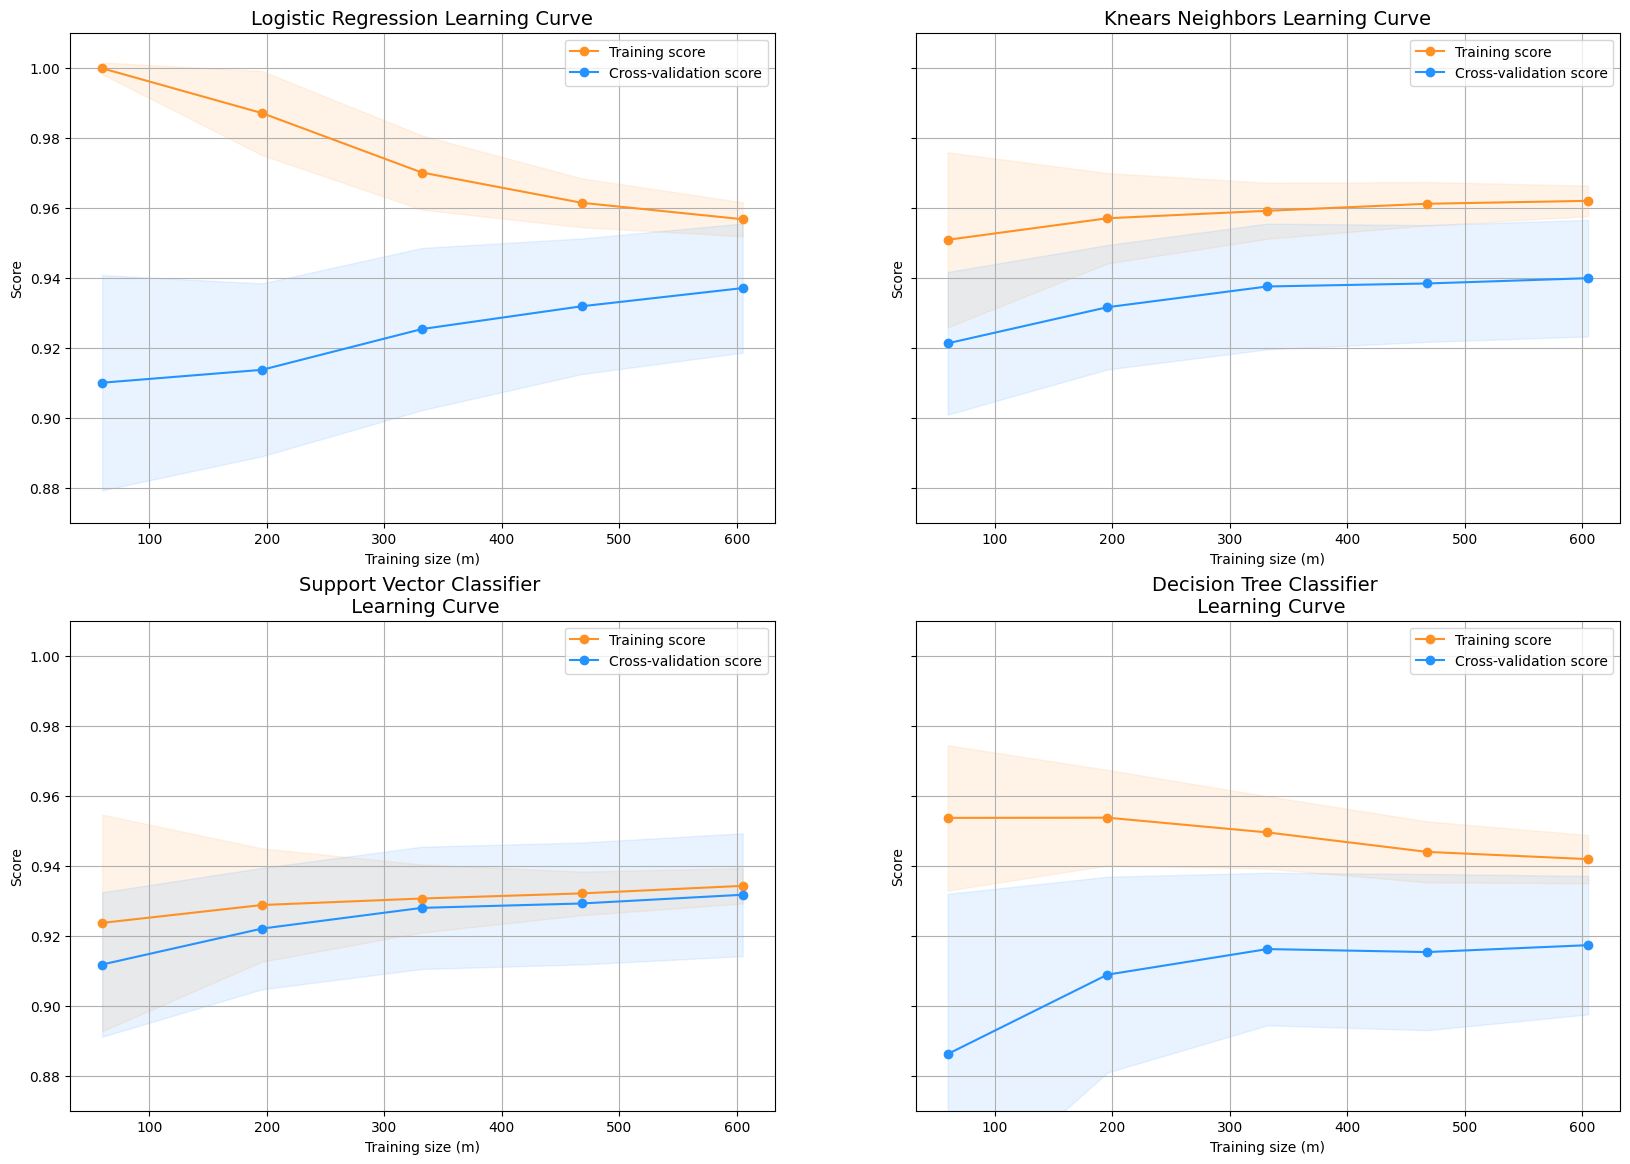

In [283]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [284]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [285]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9707017053396702
KNears Neighbors:  0.9394883980989656
Support Vector Classifier:  0.9765795359239586
Decision Tree Classifier:  0.9211594911937377


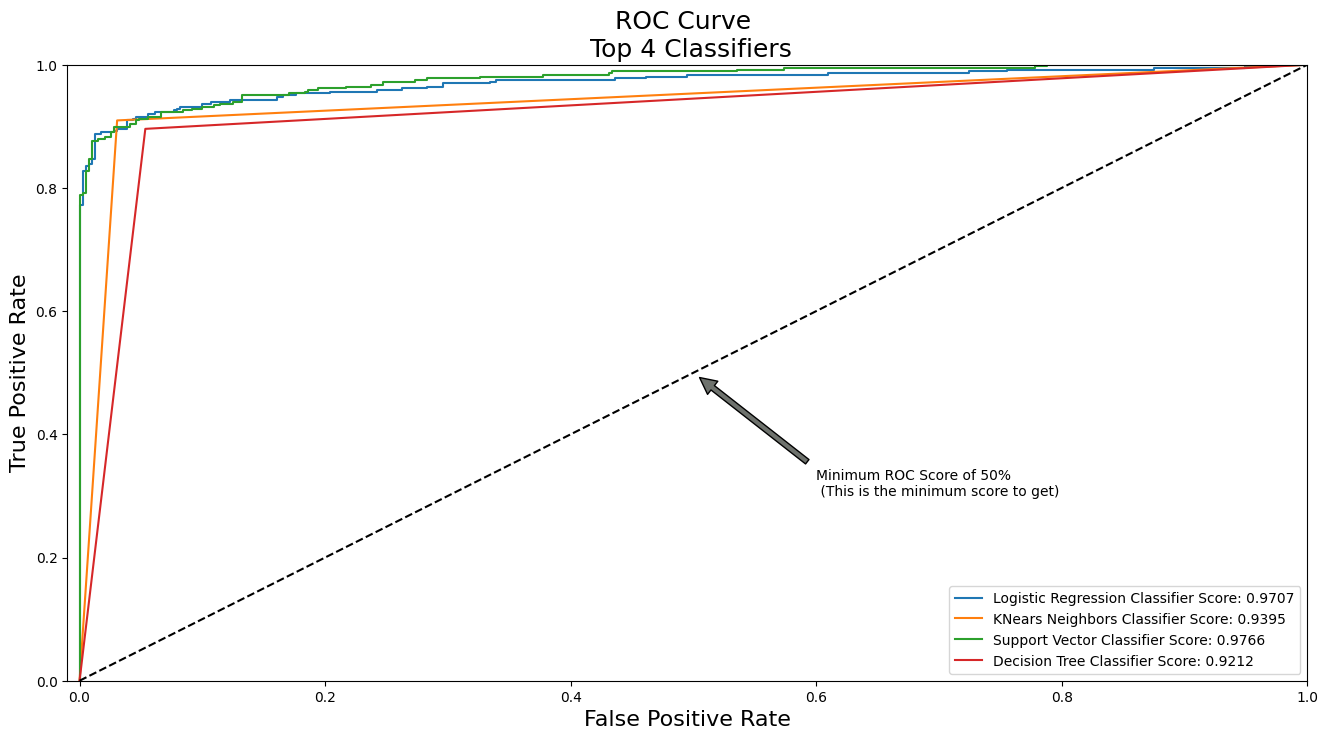

In [286]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

## A Deeper Look into LogisticRegression:
<a id="logistic"></a>
In this section we will ive a deeper look into the <b> logistic regression classifier</b>.


### Terms:
<ul>
<li><b>True Positives:</b> Correctly Classified Fraud Transactions </li>
<li><b>False Positives:</b> Incorrectly Classified Fraud Transactions</li>
<li> <b>True Negative:</b> Correctly Classified Non-Fraud Transactions</li>
<li> <b>False Negative:</b> Incorrectly Classified Non-Fraud Transactions</li>
<li><b>Precision: </b>  True Positives/(True Positives + False Positives)  </li>
<li><b> Recall: </b> True Positives/(True Positives + False Negatives)   </li>
<li> Precision as the name says, says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.</li>
<li><b>Precision/Recall Tradeoff: </b> The more precise (selective) our model is, the less cases it will detect. Example: Assuming that our model has a precision of 95%, Let's say there are only 5 fraud cases in which the model is 95% precise or more that these are fraud cases. Then let's say there are 5 more cases that our model considers 90% to be a fraud case, if we lower the precision there are more cases that our model will be able to detect. </li>
</ul>

### Summary:
<ul>
<li> <b>Precision starts to descend</b> between 0.90 and 0.92 nevertheless, our precision score is still pretty high and still we have a descent recall score. </li>

</ul>

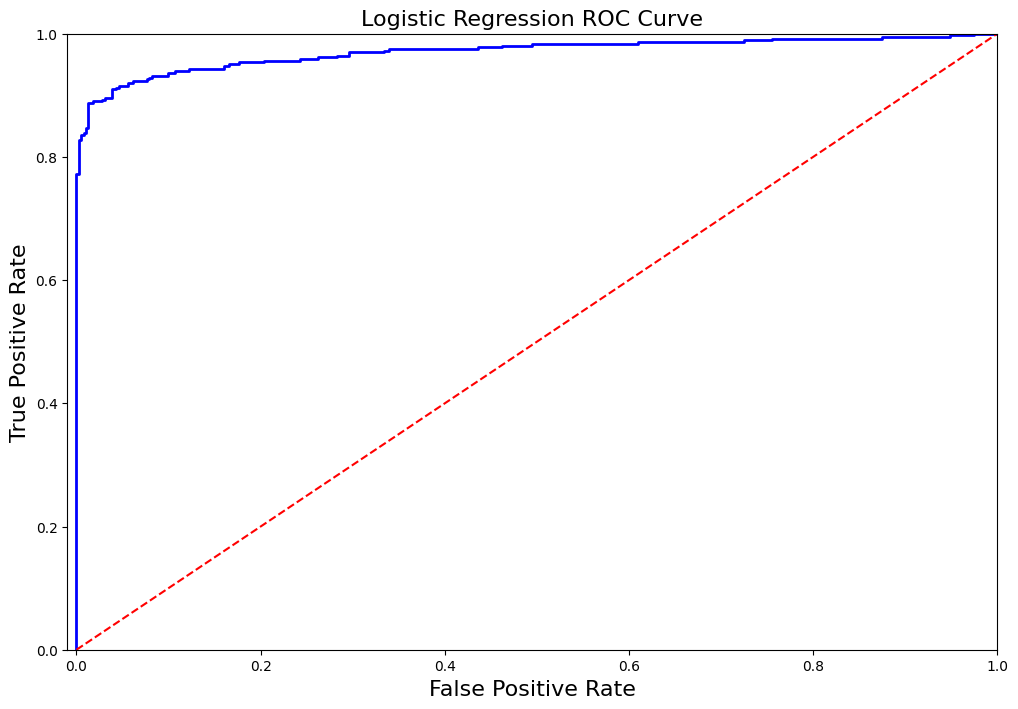

In [287]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [288]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [289]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 0.92
Precision Score: 0.68
F1 Score: 0.78
Accuracy Score: 0.76
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: 0.55
Precision Score: 0.00
Recall Score: 0.46
F1 Score: 0.00
---------------------------------------------------------------------------------------------------------------------------------------


In [290]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [291]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 0.06


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.06')

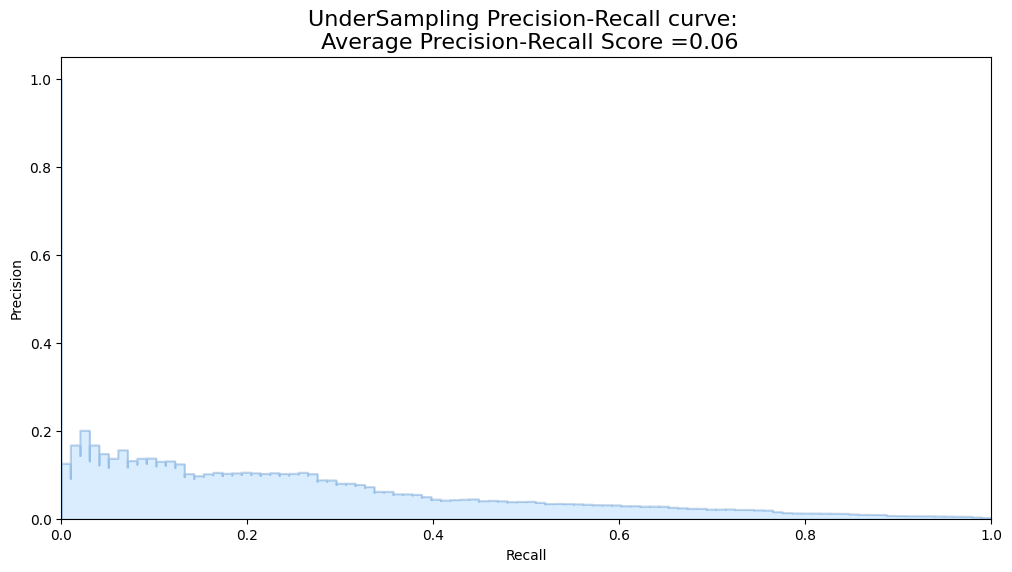

In [292]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

### SMOTE Technique (Over-Sampling):
<a id="smote"></a>
<img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png", width=800>
<b>SMOTE</b> stands for Synthetic Minority Over-sampling Technique.  Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. </li>
<li><b>Location of the synthetic points: </b>   SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. </li>
<li> <b>Final Effect:  </b> More information is retained since we didn't have to delete any rows unlike in random undersampling.</li>
<li><b> Accuracy || Time Tradeoff: </b> Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.</li>

</ul>

### Cross Validation Overfitting Mistake:
## Overfitting during Cross Validation:  
In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. <b>In the following section you will see amazing precision and recall scores but in reality our data is overfitting!</b>
### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

As mentioned previously, if we get the minority class ("Fraud) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: <br>


### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>
As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.




**References**: 
<ul>
<li><a src="https://www.marcoaltini.com/blog/dealing-with-imbalanced-data-undersampling-oversampling-and-proper-cross-validation"> 
DEALING WITH IMBALANCED DATA: UNDERSAMPLING, OVERSAMPLING AND PROPER CROSS-VALIDATION </a></li> 

<li> <a src="http://rikunert.com/SMOTE_explained "> SMOTE explained for noobs  </a></li>
<li> <a src="https://www.youtube.com/watch?v=DQC_YE3I5ig&t=794s"> Machine Learning - Over-& Undersampling - Python/ Scikit/ Scikit-Imblearn </a></li>
</ul>

In [293]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
import numpy as np

log_reg_params = {
    "penalty": ['l1', 'l2'],
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "solver": ['liblinear']  # fondamentale!
}

accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

for train, test in sss.split(original_Xtrain, original_ytrain):
    rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4, n_jobs=-1, cv=2)
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg)
    
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    
    # Estrae il miglior stimatore dalla grid interna
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))

print('---' * 45)
print("\naccuracy:  {:.4f}".format(np.mean(accuracy_lst)))
print("precision: {:.4f}".format(np.mean(precision_lst)))
print("recall:    {:.4f}".format(np.mean(recall_lst)))
print("f1:        {:.4f}".format(np.mean(f1_lst)))
print("auc:       {:.4f}".format(np.mean(auc_lst)))
print('---' * 45)


---------------------------------------------------------------------------------------------------------------------------------------

accuracy:  0.9740
precision: 0.0568
recall:    0.8984
f1:        0.1069
auc:       0.9363
---------------------------------------------------------------------------------------------------------------------------------------


In [294]:
labels = ['No Fraud', 'Fraud']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

    No Fraud       1.00      0.98      0.99     56863
       Fraud       0.06      0.92      0.12        98

    accuracy                           0.98     56961
   macro avg       0.53      0.95      0.55     56961
weighted avg       1.00      0.98      0.99     56961



In [295]:
y_score = best_est.decision_function(original_Xtest)

In [296]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.74


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.74')

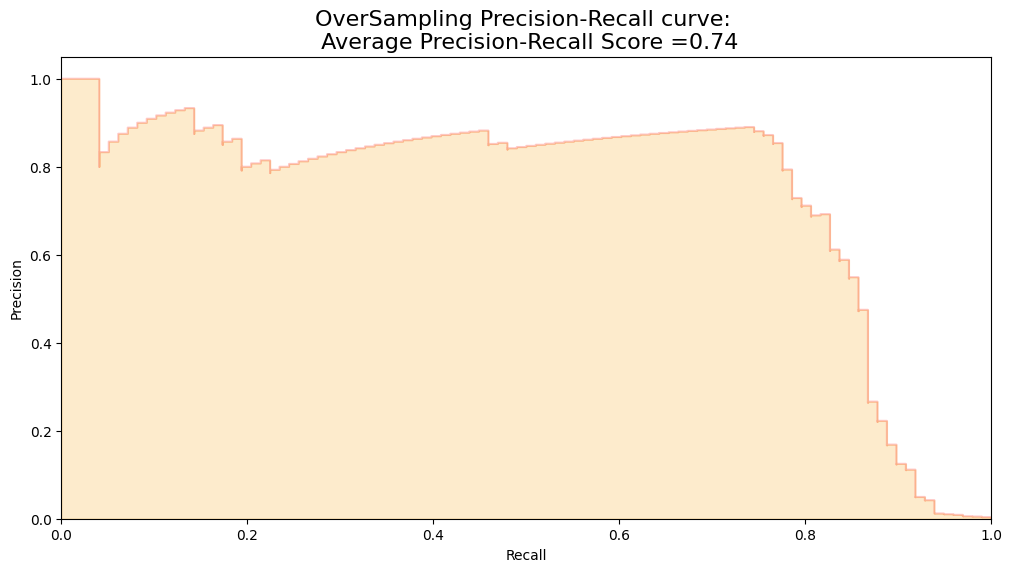

In [297]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [298]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)
# Write the new data to a csv file
smote_df = pd.DataFrame(Xsm_train, columns=X.columns)
smote_df['Class'] = ysm_train
smote_df.to_csv('./dataset/creditcard_smote.csv', index=False)


In [299]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :1.335845947265625 sec


# Test Data with Logistic Regression:
<a id="testing_logistic"></a>
## Confusion Matrix:
**Positive/Negative:** Type of Class (label) ["No", "Yes"]
**True/False:** Correctly or Incorrectly classified by the model.<br><br>

**True Negatives (Top-Left Square):** This is the number of **correctly** classifications of the "No" (No Fraud Detected) class. <br><br>

**False Negatives (Top-Right Square):** This is the number of **incorrectly** classifications of the "No"(No Fraud Detected) class. <br><br>

**False Positives (Bottom-Left Square):** This is the number of **incorrectly** classifications of the "Yes" (Fraud Detected) class <br><br>

**True Positives (Bottom-Right Square):** This is the number of **correctly** classifications of the "Yes" (Fraud Detected) class.


### Summary: 
<ul>
<li> <b>Random UnderSampling:</b> We will evaluate the final performance of the classification models in the random undersampling subset. <b>Keep in mind that this is not the data from the original dataframe. </b> </li>
<li> <b>Classification Models: </b> The models that performed the best were <b>logistic regression </b> and <b>support vector classifier (SVM)</b>  </li>
</ul>

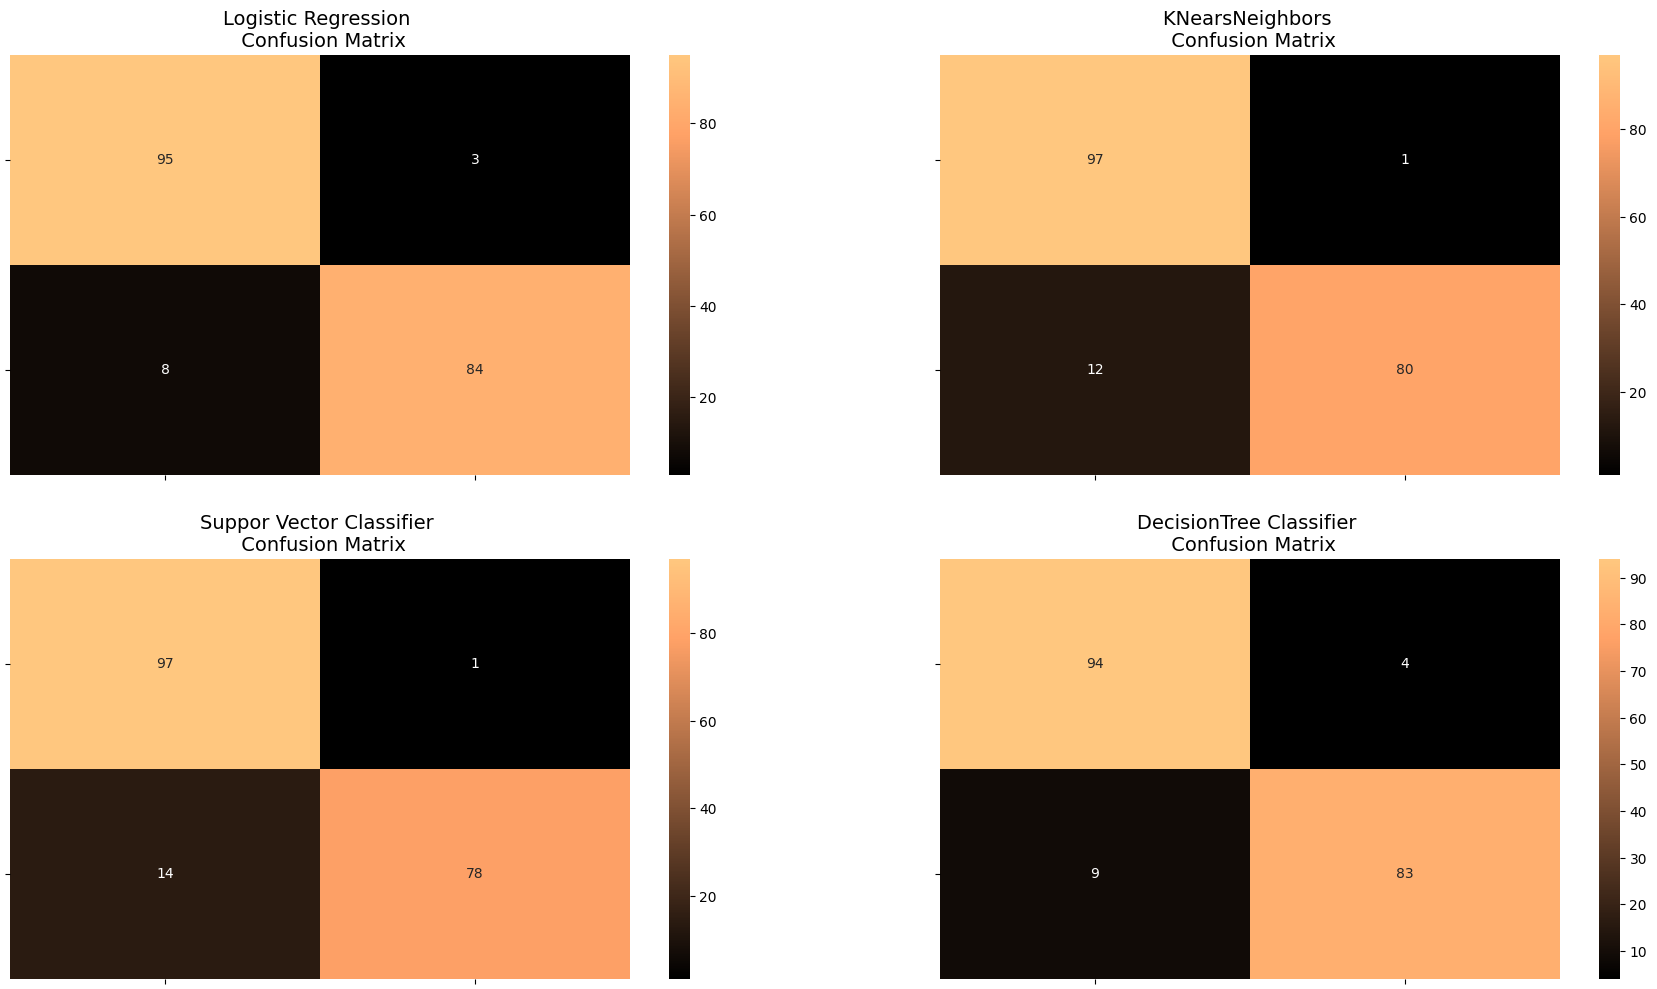

In [300]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [301]:
from sklearn.metrics import classification_report


print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.91      0.94        92

    accuracy                           0.94       190
   macro avg       0.94      0.94      0.94       190
weighted avg       0.94      0.94      0.94       190

KNears Neighbors:
              precision    recall  f1-score   support

           0       0.89      0.99      0.94        98
           1       0.99      0.87      0.92        92

    accuracy                           0.93       190
   macro avg       0.94      0.93      0.93       190
weighted avg       0.94      0.93      0.93       190

Support Vector Classifier:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93        98
           1       0.99      0.85      0.91        92

    accuracy                           0.92       190
   macro avg       0.93      0.92      0.92       190
weighted

In [302]:
# Final Score in the test set of logistic regression
from sklearn.metrics import accuracy_score

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.942105
1,Oversampling (SMOTE),0.977125


## Neural Networks Testing Random UnderSampling Data vs OverSampling (SMOTE): 
<a id="neural_networks"></a>
In this section we will implement a simple Neural Network (with one hidden layer) in order to see  which of the two logistic regressions models we implemented in the (undersample or oversample(SMOTE)) has a better accuracy for detecting fraud and non-fraud transactions. <br><br>

### Our Main Goal:
Our main goal is to explore how our simple neural network behaves in both the random undersample and oversample dataframes and see whether they can predict accuractely both non-fraud and fraud cases. Why not only focus on fraud? Imagine you were a cardholder and after you purchased an item your card gets blocked because the bank's algorithm thought your purchase was a fraud. That's why we shouldn't emphasize only in detecting fraud cases but we should also emphasize correctly categorizing non-fraud transactions.


### The Confusion Matrix:
Here is again, how the confusion matrix works:
<ul>
<li><b>Upper Left Square: </b> The amount of <b>correctly</b> classified by our model of  no fraud transactions. </li>
<li> <b>Upper Right Square:</b> The amount of  <b>incorrectly </b> classified transactions as fraud cases, but the actual label is <b> no fraud </b>. </li>
<li><b>Lower Left Square:</b> The amount of <b> incorrectly </b> classified transactions as no fraud cases, but the actual label is <b>fraud </b>. </li>
<li><b> Lower Right Square:</b> The amount of  <b>correctly</b> classified by our model of fraud transactions. </li>
</ul>

### Summary (Keras || Random UnderSampling):
<ul>
<li><b>Dataset: </b> In this final phase of testing we will fit this model in both the <b>random undersampled subset</b>  and <b> oversampled dataset (SMOTE) </b>in order to predict the final result using the <b>original dataframe testing data.</b> </li>
<li>  <b>Neural Network Structure: </b> As stated previously, this will be a simple model composed of one input layer (where the number of nodes equals the number of features) plus bias node, one hidden layer with 32 nodes and one output node composed of two possible results 0 or 1 (No fraud or fraud). </li>
<li> <b>Other characteristics:</b> The learning rate will be 0.001, the optimizer we will use is the AdamOptimizer, the activation function that is used in this scenario is "Relu" and for the final outputs we will use sparse categorical cross entropy, which gives the probability whether an instance case is no fraud or fraud (The prediction will pick the highest probability between the two.) </li>
</ul>


In [303]:
import keras
from keras import backend as K
from keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from keras.layers import Activation
#from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [304]:
undersample_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

In [305]:
from tensorflow.keras.optimizers import Adam

undersample_model.compile(optimizer=Adam(learning_rate=0.001), 
                          loss='sparse_categorical_crossentropy', 
                          metrics=['accuracy'])

In [306]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
25/25 - 1s - 27ms/step - accuracy: 0.7306 - loss: 0.5428 - val_accuracy: 0.9013 - val_loss: 0.4021
Epoch 2/20
25/25 - 0s - 4ms/step - accuracy: 0.8810 - loss: 0.3101 - val_accuracy: 0.9276 - val_loss: 0.3004
Epoch 3/20
25/25 - 0s - 4ms/step - accuracy: 0.9223 - loss: 0.2332 - val_accuracy: 0.9408 - val_loss: 0.2457
Epoch 4/20
25/25 - 0s - 4ms/step - accuracy: 0.9405 - loss: 0.1874 - val_accuracy: 0.9539 - val_loss: 0.2025
Epoch 5/20
25/25 - 0s - 4ms/step - accuracy: 0.9421 - loss: 0.1617 - val_accuracy: 0.9605 - val_loss: 0.1773
Epoch 6/20
25/25 - 0s - 4ms/step - accuracy: 0.9455 - loss: 0.1427 - val_accuracy: 0.9605 - val_loss: 0.1615
Epoch 7/20
25/25 - 0s - 4ms/step - accuracy: 0.9488 - loss: 0.1293 - val_accuracy: 0.9605 - val_loss: 0.1491
Epoch 8/20
25/25 - 0s - 4ms/step - accuracy: 0.9537 - loss: 0.1188 - val_accuracy: 0.9605 - val_loss: 0.1410
Epoch 9/20
25/25 - 0s - 4ms/step - accuracy: 0.9570 - loss: 0.1122 - val_accuracy: 0.9605 - val_loss: 0.1418
Epoch 10/20
25/25 

In [307]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [308]:
import numpy as np

pred_probs = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)
undersample_fraud_predictions = np.argmax(pred_probs, axis=1)


In [309]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[55064  1799]
 [    7    91]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


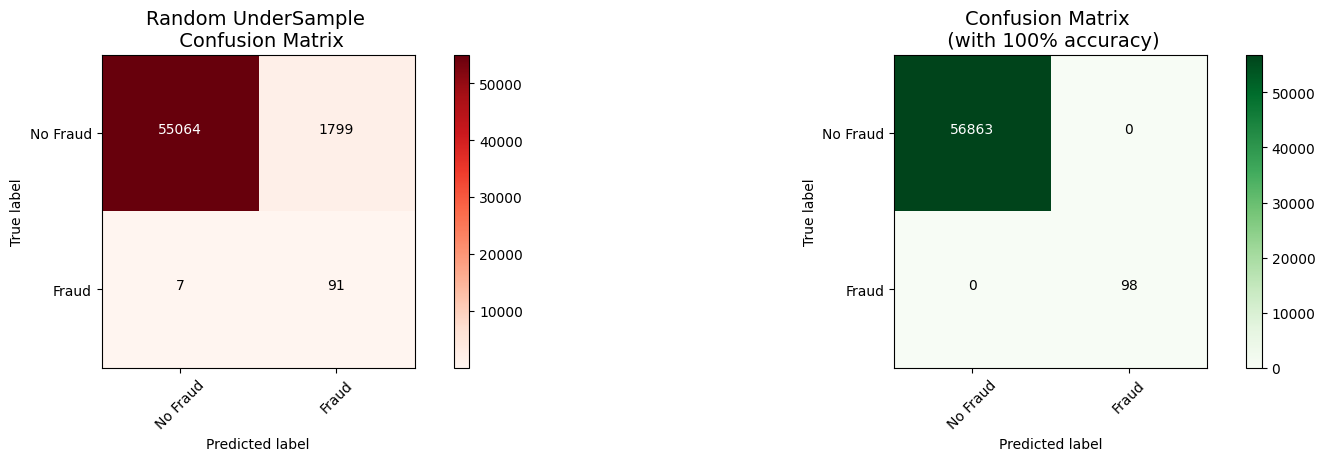

In [310]:
undersample_cm = confusion_matrix(original_ytest, undersample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Keras || OverSampling (SMOTE):


In [311]:
n_inputs = Xsm_train.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [312]:
from tensorflow.keras.optimizers import Adam

oversample_model.compile(
    optimizer=Adam(learning_rate=0.001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [313]:
oversample_model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
1214/1214 - 2s - 2ms/step - accuracy: 0.9756 - loss: 0.0654 - val_accuracy: 0.9936 - val_loss: 0.0294
Epoch 2/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9967 - loss: 0.0141 - val_accuracy: 0.9980 - val_loss: 0.0134
Epoch 3/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9983 - loss: 0.0081 - val_accuracy: 0.9999 - val_loss: 0.0039
Epoch 4/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9989 - loss: 0.0059 - val_accuracy: 0.9999 - val_loss: 0.0047
Epoch 5/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 6/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9993 - loss: 0.0035 - val_accuracy: 0.9997 - val_loss: 0.0063
Epoch 7/20
1214/1214 - 2s - 1ms/step - accuracy: 0.9994 - loss: 0.0032 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9998 - val_loss: 0.0021
Epoch 9/20
1214/1214 - 1s - 1ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9991 - 

In [314]:
oversample_predictions = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [315]:
import numpy as np

oversample_pred_probs = oversample_model.predict(original_Xtest, batch_size=200, verbose=0)
oversample_fraud_predictions = np.argmax(oversample_pred_probs, axis=1)


Confusion matrix, without normalization
[[56812    51]
 [   14    84]]
Confusion matrix, without normalization
[[56863     0]
 [    0    98]]


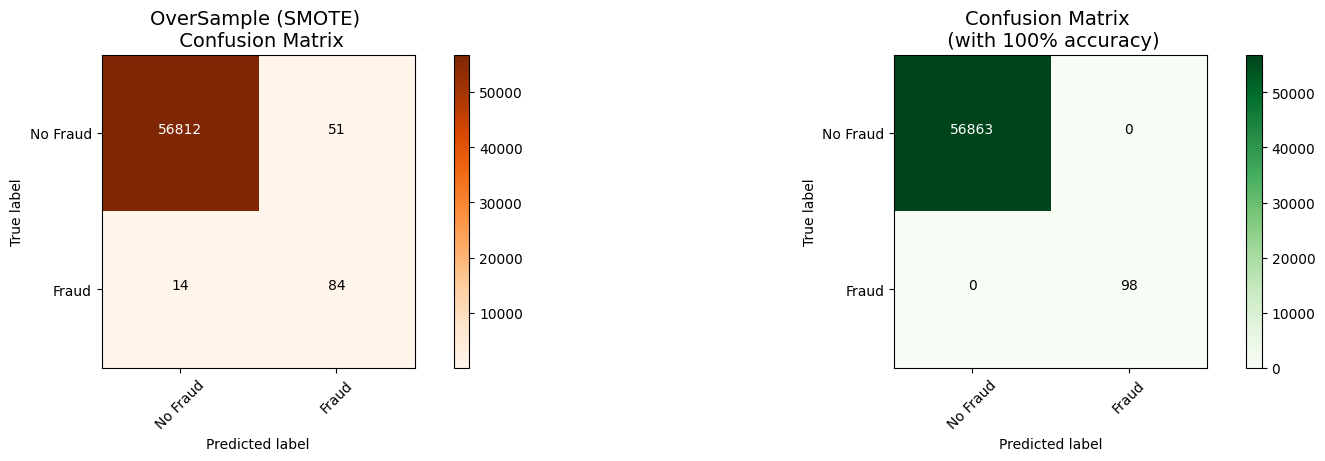

In [316]:
oversample_smote = confusion_matrix(original_ytest, oversample_fraud_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No Fraud', 'Fraud']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

### Conclusion: 
Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels (more no fraud than fraud transactions). Nevertheless, I still have to state that sometimes the neural network on the oversampled dataset predicts less correct fraud transactions than our model using the undersample dataset. However, remember that the removal of outliers was implemented only on the random undersample dataset and not on the oversampled one. Also, in our undersample data our model is unable to detect for a large number of cases non fraud transactions correctly and instead, misclassifies those non fraud transactions as fraud cases. Imagine that people that were making regular purchases got their card blocked due to the reason that our model classified that transaction as a fraud transaction, this will be a huge disadvantage for the financial institution. The number of customer complaints and customer disatisfaction will increase.  The next step of this analysis will be to do an outlier removal on our oversample dataset and see if our accuracy in the test set improves. <br><br>

**Note:** One last thing, predictions and accuracies may be subjected to change since I implemented data shuffling on both types of dataframes. The main thing is to see if our models are able to correctly classify no fraud and fraud transactions. I will bring more updates, stay tuned!
